In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset_complete.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.633808,0.538767,-7.553034e-08,0.652026,0.463880,0.019973,0.650992,0.399461,0.026089,0.637956,...,0.579738,0.321059,-0.028447,0.569401,0.283387,-0.027311,0.560831,0.249088,-0.026368,morning
1,0.647041,0.468644,-2.480768e-08,0.662029,0.409536,0.009102,0.663133,0.348328,0.009548,0.647949,...,0.605739,0.273434,-0.031588,0.596649,0.235230,-0.032386,0.590058,0.201010,-0.032410,morning
2,0.485280,0.843497,3.992614e-07,0.504689,0.789330,-0.002010,0.540197,0.760171,-0.008754,0.570446,...,0.596017,0.908766,-0.055886,0.625845,0.911313,-0.059140,0.651035,0.912314,-0.060131,morning
3,0.624286,0.562860,-5.620544e-08,0.646800,0.485877,0.015011,0.649273,0.417948,0.017868,0.632660,...,0.562384,0.349430,-0.032668,0.551220,0.308078,-0.032680,0.542871,0.270188,-0.032279,morning
4,0.520808,0.811060,2.920898e-07,0.535095,0.758401,0.000273,0.567530,0.727622,-0.003593,0.595568,...,0.633190,0.872644,-0.046836,0.661326,0.871893,-0.049776,0.685389,0.870446,-0.050432,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,help
150,0.551984,0.884248,-6.568489e-08,0.537837,0.825257,-0.004622,0.519846,0.781620,-0.010896,0.503905,...,0.474958,0.922170,-0.011546,0.485300,0.921094,-0.007427,0.496504,0.920977,-0.003872,help
151,0.589401,0.879691,-4.653480e-08,0.576524,0.831943,-0.002715,0.557894,0.787007,-0.008211,0.543112,...,0.515797,0.910437,-0.015929,0.523028,0.909962,-0.011582,0.533670,0.907686,-0.008091,help
152,0.550737,0.880462,-1.141766e-07,0.537156,0.821056,-0.006693,0.517945,0.776152,-0.012641,0.498974,...,0.477002,0.930313,-0.013126,0.488614,0.930534,-0.010681,0.502284,0.927114,-0.007571,help


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.633808,0.538767,-7.553034e-08,0.652026,0.463880,0.019973,0.650992,0.399461,0.026089,0.637956,...,0.579738,0.321059,-0.028447,0.569401,0.283387,-0.027311,0.560831,0.249088,-0.026368,morning
1,0.647041,0.468644,-2.480768e-08,0.662029,0.409536,0.009102,0.663133,0.348328,0.009548,0.647949,...,0.605739,0.273434,-0.031588,0.596649,0.235230,-0.032386,0.590058,0.201010,-0.032410,morning
2,0.485280,0.843497,3.992614e-07,0.504689,0.789330,-0.002010,0.540197,0.760171,-0.008754,0.570446,...,0.596017,0.908766,-0.055886,0.625845,0.911313,-0.059140,0.651035,0.912314,-0.060131,morning
3,0.624286,0.562860,-5.620544e-08,0.646800,0.485877,0.015011,0.649273,0.417948,0.017868,0.632660,...,0.562384,0.349430,-0.032668,0.551220,0.308078,-0.032680,0.542871,0.270188,-0.032279,morning
4,0.520808,0.811060,2.920898e-07,0.535095,0.758401,0.000273,0.567530,0.727622,-0.003593,0.595568,...,0.633190,0.872644,-0.046836,0.661326,0.871893,-0.049776,0.685389,0.870446,-0.050432,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,help
150,0.551984,0.884248,-6.568489e-08,0.537837,0.825257,-0.004622,0.519846,0.781620,-0.010896,0.503905,...,0.474958,0.922170,-0.011546,0.485300,0.921094,-0.007427,0.496504,0.920977,-0.003872,help
151,0.589401,0.879691,-4.653480e-08,0.576524,0.831943,-0.002715,0.557894,0.787007,-0.008211,0.543112,...,0.515797,0.910437,-0.015929,0.523028,0.909962,-0.011582,0.533670,0.907686,-0.008091,help
152,0.550737,0.880462,-1.141766e-07,0.537156,0.821056,-0.006693,0.517945,0.776152,-0.012641,0.498974,...,0.477002,0.930313,-0.013126,0.488614,0.930534,-0.010681,0.502284,0.927114,-0.007571,help


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (154, 63)
Labels shape = (154,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#using SVM
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['good', 'good', 'how', 'good', 'how', 'morning', 'good', 'good',
       'good', 'hello', 'morning', 'good', 'morning', 'good', 'good',
       'good', 'good', 'hello', 'good', 'hello', 'good', 'morning',
       'morning', 'how', 'good', 'good', 'good', 'good', 'good', 'good',
       'how'], dtype=object)

In [7]:
matrix_confusion= confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8387096774193549, 0.8387096774193549, 0.8387096774193549)

NameError: name 'cf_matrix' is not defined

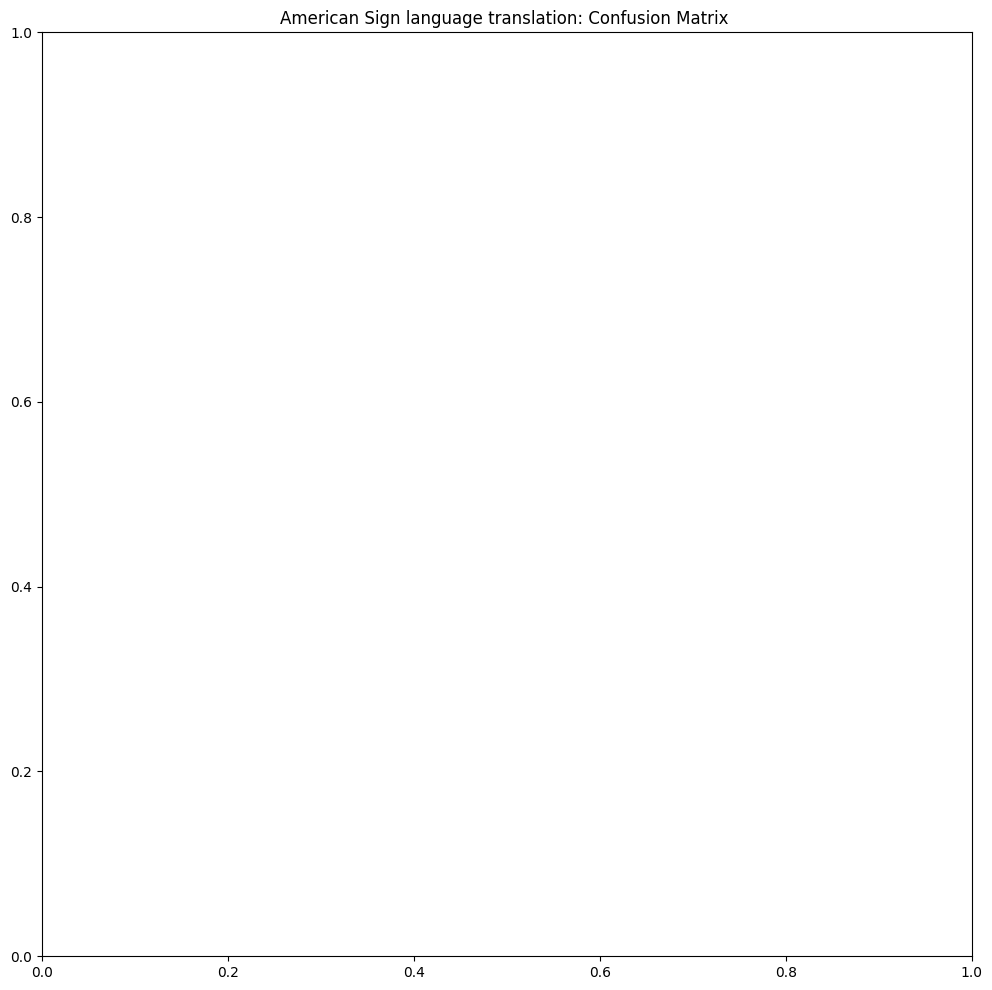

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("American Sign language translation: Confusion Matrix ")

maping = sns.heatmap(matrix_confusion, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('svm.pkl','wb') as f:
    pickle.dump(svm,f)

In [ ]:
SCORE = accuracy_score(y_test, y_pred)
print(SCORE)

0.8378378378378378
